In [2]:
pip install tweepy

     |████████████████████████████████| 77 kB 7.1 MB/s eta 0:00:011
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.


## I included also an HTML version so that if the visualizations are not visible it is possible to directly check on that version withouth the necessity of rerunning this file.

In [ ]:
import requests
import os
import datetime
import csv
import pandas as pd
import json
import dateutil.parser
import unicodedata
from bs4 import BeautifulSoup
import pandas as pd
import re 
from string import punctuation
import spacy
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk import SnowballStemmer
import requests
import numpy as np
import tweepy
nlp = spacy.load('en_core_web_sm')
from tqdm import tqdm
import os
import json
import csv
import datetime
import dateutil.parser
import unicodedata
import time

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 7, 'font.style': 'normal', 'font.family':'serif'})

# DATASET SCRAPING

In [ ]:
URL = "https://sportsnaut.com/best-nba-players-right-now/"
page = requests.get(URL)

soup = BeautifulSoup(page.content, 'html.parser')

def remove_punctuation(text):
      return ' '.join([word for word in word_tokenize(text) if word not in punctuation])

#I extract from Sports Naut the ranking of the top 50 players in the NBA
top50 = [name.get_text() for name in soup.find_all("h2")]
#However I will work with a fraction of them, I select 15
top15 =top50[36:]
tokens = [[token for token in nlp(sentence)]for sentence in top15]
trans=[]
for token in tokens:
    trans.append(token[2:4])
trans_=[]
#I deleted the players who has not a twitter account
for name in trans:
    if str(name[0])!='Best' and str(name[0])!='players' and str(name[0])!='Nikola':
        trans_.append(name)
top15=[]
for word in trans_:
    top15.append(remove_punctuation(str(word)))
twitter_names = ['Giannis_An34','StephenCurry30','JoelEmbiid','KingJames','KDTrey5','kawhileonard','luka7doncic','TheTraeYoung','CP3','DevinBook','RealDealBeal23','JimmyButler','Yg_Trece','JaMorant','DeMar_DeRozan']
Players = {name:tw_username for name,tw_username in zip(top15,twitter_names[::-1])}
Players


### PLAYERS' STATISTICS DATASET

In [ ]:
#GIANNIS ANTETOKOUNMPO
URL = "https://www.basketball-reference.com/players/a/antetgi01/gamelog/2018"
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')
tables = soup.find_all("table")
table = tables[7]
tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
df = pd.DataFrame(tab_data)
table = df.iloc[1:,]
col = df.iloc[0]
sea17_18 = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
URL = ["https://www.basketball-reference.com/players/a/antetgi01/gamelog/2019","https://www.basketball-reference.com/players/a/antetgi01/gamelog/2020","https://www.basketball-reference.com/players/a/antetgi01/gamelog/2021","https://www.basketball-reference.com/players/a/antetgi01/gamelog/2022"]
GA_seasons = sea17_18
for url in URL:
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    tables = soup.find_all("table")
    table = tables[7]
    tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
    df = pd.DataFrame(tab_data)
    table = df.iloc[1:,]
    col = df.iloc[0]
    season = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
    GA_seasons = pd.concat((GA_seasons,season.iloc[1:,]),axis=0)

names = pd.Series(np.array([[("Giannis Antetokounmpo") for _ in range(GA_seasons.shape[0])]]).flatten())
GA_seasons['names'] = names
GA_seasons.dropna(axis=0,thresh=11,how='all',inplace=True)
GA_seasons = GA_seasons[GA_seasons['Date']!='Date']
df = GA_seasons[['Date','FG','3P','FGA','PTS','names']]
df1 = GA_seasons.loc[:,'Tm':'GS']
GA_seasons = pd.concat((df,df1),axis=1)
GA_seasons = GA_seasons.iloc[:,:-1]
GA_seasons['FG'] = GA_seasons['FG'].astype('float')
GA_seasons['3P'] = GA_seasons['3P'].astype('float')
GA_seasons['FGA'] = GA_seasons['FGA'].astype('float')
GA_seasons['EFG'] = (GA_seasons['FG'] + 0.5*GA_seasons['3P'])/GA_seasons['FGA']

In [ ]:
#STEPH CURRY
URL = "https://www.basketball-reference.com/players/c/curryst01/gamelog/2018"
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')
tables = soup.find_all("table")
table = tables[7]
tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
df = pd.DataFrame(tab_data)
table = df.iloc[1:,]
col = df.iloc[0]
sea17_18 = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
URL = ["https://www.basketball-reference.com/players/c/curryst01/gamelog/2019","https://www.basketball-reference.com/players/c/curryst01/gamelog/2020","https://www.basketball-reference.com/players/c/curryst01/gamelog/2020","https://www.basketball-reference.com/players/c/curryst01/gamelog/2021","https://www.basketball-reference.com/players/c/curryst01/gamelog/2022"]
SC_seasons=sea17_18
for url in URL:
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    tables = soup.find_all("table")
    table = tables[7]
    tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
    df = pd.DataFrame(tab_data)
    table = df.iloc[1:,]
    col = df.iloc[0]
    season = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
    SC_seasons = pd.concat((SC_seasons,season.iloc[1:,]),axis=0)
names = pd.Series(np.array([[("Stephen Curry") for _ in range(SC_seasons.shape[0])]]).flatten())
SC_seasons['names'] = names
SC_seasons.dropna(axis=0,thresh=11,how='all',inplace=True)
SC_seasons = SC_seasons[SC_seasons['Date']!='Date']
df = SC_seasons[['Date','FG','3P','FGA','PTS','names']]
df1 = SC_seasons.loc[:,'Tm':'GS']
SC_seasons = pd.concat((df,df1),axis=1)
SC_seasons = SC_seasons.iloc[:,:-1]
SC_seasons['3P'] = SC_seasons['3P'].fillna(0)
SC_seasons['3P'] =pd.to_numeric(SC_seasons['3P'], errors='coerce')
SC_seasons['FG'] = SC_seasons['FG'].fillna(0)
SC_seasons['FG'] = pd.to_numeric(SC_seasons['FG'], errors='coerce')
SC_seasons['FGA'] = SC_seasons['FGA'].fillna(0)
SC_seasons['FGA'] = pd.to_numeric(SC_seasons['FGA'], errors='coerce')
SC_seasons['EFG'] = (SC_seasons['FG'] + 0.5*SC_seasons['3P'])/SC_seasons['FGA']

In [ ]:
#Joel Embiid
URL = "https://www.basketball-reference.com/players/e/embiijo01/gamelog/2018"
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')
tables = soup.find_all("table")
table = tables[7]
tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
df = pd.DataFrame(tab_data)
table = df.iloc[1:,]
col = df.iloc[0]
sea17_18 = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
URL = ["https://www.basketball-reference.com/players/e/embiijo01/gamelog/2019","https://www.basketball-reference.com/players/e/embiijo01/gamelog/2020","https://www.basketball-reference.com/players/e/embiijo01/gamelog/2021","https://www.basketball-reference.com/players/e/embiijo01/gamelog/2022"]
EMB_seasons=sea17_18
for url in URL:
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    tables = soup.find_all("table")
    table = tables[7]
    tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
    df = pd.DataFrame(tab_data)
    table = df.iloc[1:,]
    col = df.iloc[0]
    season = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
    EMB_seasons = pd.concat((EMB_seasons,season.iloc[1:,]),axis=0)
names = pd.Series(np.array([[("Joel Embiid") for _ in range(EMB_seasons.shape[0])]]).flatten())
EMB_seasons['names'] = names
EMB_seasons.dropna(axis=0,thresh=11,how='all',inplace=True)
EMB_seasons = EMB_seasons[EMB_seasons['Date']!='Date']
df = EMB_seasons[['Date','FG','3P','FGA','PTS','names']]
df1 = EMB_seasons.loc[:,'Tm':'GS']
EMB_seasons = pd.concat((df,df1),axis=1)
EMB_seasons = EMB_seasons.iloc[:,:-1]
EMB_seasons['3P'] = EMB_seasons['3P'].fillna(0)
EMB_seasons['3P'] =pd.to_numeric(EMB_seasons['3P'], errors='coerce')
EMB_seasons['FG'] = EMB_seasons['FG'].fillna(0)
EMB_seasons['FG'] = pd.to_numeric(EMB_seasons['FG'], errors='coerce')
EMB_seasons['FGA'] = EMB_seasons['FGA'].fillna(0)
EMB_seasons['FGA'] = pd.to_numeric(EMB_seasons['FGA'], errors='coerce')
EMB_seasons['EFG'] = (EMB_seasons['FG'] + 0.5*EMB_seasons['3P'])/EMB_seasons['FGA']


In [ ]:
#LeBron James
URL = "https://www.basketball-reference.com/players/j/jamesle01/gamelog/2018"
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')
tables = soup.find_all("table")
table = tables[7]
tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
df = pd.DataFrame(tab_data)
table = df.iloc[1:,]
col = df.iloc[0]
sea17_18 = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
URL = ["https://www.basketball-reference.com/players/j/jamesle01/gamelog/2019","https://www.basketball-reference.com/players/j/jamesle01/gamelog/2020","https://www.basketball-reference.com/players/j/jamesle01/gamelog/2021","https://www.basketball-reference.com/players/j/jamesle01/gamelog/2022"]
LBJ_seasons=sea17_18
for url in URL:
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    tables = soup.find_all("table")
    table = tables[7]
    tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
    df = pd.DataFrame(tab_data)
    table = df.iloc[1:,]
    col = df.iloc[0]
    season = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
    LBJ_seasons = pd.concat((LBJ_seasons,season.iloc[1:,]),axis=0)
names = pd.Series(np.array([[("Lebron James") for _ in range(LBJ_seasons.shape[0])]]).flatten())
LBJ_seasons['names'] = names
LBJ_seasons.dropna(axis=0,thresh=11,how='all',inplace=True)
LBJ_seasons = LBJ_seasons[LBJ_seasons['Date']!='Date']
df = LBJ_seasons[['Date','FG','3P','FGA','PTS','names']]
df1 = LBJ_seasons.loc[:,'Tm':'GS']
LBJ_seasons = pd.concat((df,df1),axis=1)
LBJ_seasons = LBJ_seasons.iloc[:,:-1]
LBJ_seasons['3P'] = LBJ_seasons['3P'].fillna(0)
LBJ_seasons['3P'] =pd.to_numeric(LBJ_seasons['3P'], errors='coerce')
LBJ_seasons['FG'] = LBJ_seasons['FG'].fillna(0)
LBJ_seasons['FG'] = pd.to_numeric(LBJ_seasons['FG'], errors='coerce')
LBJ_seasons['FGA'] = LBJ_seasons['FGA'].fillna(0)
LBJ_seasons['FGA'] = pd.to_numeric(LBJ_seasons['FGA'], errors='coerce')
LBJ_seasons['EFG'] = (LBJ_seasons['FG'] + 0.5*LBJ_seasons['3P'])/LBJ_seasons['FGA']

In [ ]:
#Kevin Durant https://www.basketball-reference.com/players/d/duranke01/gamelog/2018
URL = "https://www.basketball-reference.com/players/d/duranke01/gamelog/2018"
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')
tables = soup.find_all("table")
table = tables[7]
tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
df = pd.DataFrame(tab_data)
table = df.iloc[1:,]
col = df.iloc[0]
sea17_18 = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
URL = ["https://www.basketball-reference.com/players/d/duranke01/gamelog/2019","https://www.basketball-reference.com/players/d/duranke01/gamelog/2021","https://www.basketball-reference.com/players/d/duranke01/gamelog/2022"]
KD_seasons=sea17_18
for url in URL:
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    tables = soup.find_all("table")
    table = tables[7]
    tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
    df = pd.DataFrame(tab_data)
    table = df.iloc[1:,]
    col = df.iloc[0]
    season = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
    KD_seasons = pd.concat((KD_seasons,season.iloc[1:,]),axis=0)
names = pd.Series(np.array([[("Kevin Durant") for _ in range(KD_seasons.shape[0])]]).flatten())
KD_seasons['names'] = names
KD_seasons.dropna(axis=0,thresh=11,how='all',inplace=True)
KD_seasons = KD_seasons[KD_seasons['Date']!='Date']
df = KD_seasons[['Date','FG','3P','FGA','PTS','names']]
df1 = KD_seasons.loc[:,'Tm':'GS']
KD_seasons = pd.concat((df,df1),axis=1)
KD_seasons = KD_seasons.iloc[:,:-1]
KD_seasons['3P'] = KD_seasons['3P'].fillna(0)
KD_seasons['3P'] =pd.to_numeric(KD_seasons['3P'], errors='coerce')
KD_seasons['FG'] = KD_seasons['FG'].fillna(0)
KD_seasons['FG'] = pd.to_numeric(KD_seasons['FG'], errors='coerce')
KD_seasons['FGA'] = KD_seasons['FGA'].fillna(0)
KD_seasons['FGA'] = pd.to_numeric(KD_seasons['FGA'], errors='coerce')
KD_seasons['EFG'] = (KD_seasons['FG'] + 0.5*KD_seasons['3P'])/KD_seasons['FGA']

In [ ]:
#Kawhi Leonard
URL = "https://www.basketball-reference.com/players/l/leonaka01/gamelog/2018"
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')
tables = soup.find_all("table")
table = tables[7]
tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
df = pd.DataFrame(tab_data)
table = df.iloc[1:,]
col = df.iloc[0]
sea17_18 = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
URL = ["https://www.basketball-reference.com/players/l/leonaka01/gamelog/2019","https://www.basketball-reference.com/players/l/leonaka01/gamelog/2020","https://www.basketball-reference.com/players/l/leonaka01/gamelog/2021"]
KL_seasons=sea17_18
for url in URL:
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    tables = soup.find_all("table")
    table = tables[7]
    tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
    df = pd.DataFrame(tab_data)
    table = df.iloc[1:,]
    col = df.iloc[0]
    season = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
    KL_seasons = pd.concat((KL_seasons,season.iloc[1:,]),axis=0)
names = pd.Series(np.array([[("Kawhi Leonard") for _ in range(KL_seasons.shape[0])]]).flatten())
KL_seasons['names'] = names
KL_seasons.dropna(axis=0,thresh=11,how='all',inplace=True)
KL_seasons = KL_seasons[KL_seasons['Date']!='Date']
df = KL_seasons[['Date','FG','3P','FGA','PTS','names']]
df1 = KL_seasons.loc[:,'Tm':'GS']
KL_seasons = pd.concat((df,df1),axis=1)
KL_seasons = KL_seasons.iloc[:,:-1]
KL_seasons['3P'] = KL_seasons['3P'].fillna(0)
KL_seasons['3P'] =pd.to_numeric(KL_seasons['3P'], errors='coerce')
KL_seasons['FG'] = KL_seasons['FG'].fillna(0)
KL_seasons['FG'] = pd.to_numeric(KL_seasons['FG'], errors='coerce')
KL_seasons['FGA'] = KL_seasons['FGA'].fillna(0)
KL_seasons['FGA'] = pd.to_numeric(KL_seasons['FGA'], errors='coerce')
KL_seasons['EFG'] = (KL_seasons['FG'] + 0.5*KL_seasons['3P'])/KL_seasons['FGA']

In [ ]:
#Luka Doncic
URL = "https://www.basketball-reference.com/players/d/doncilu01/gamelog/2019"
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')
tables = soup.find_all("table")
table = tables[7]
tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
df = pd.DataFrame(tab_data)
table = df.iloc[1:,]
col = df.iloc[0]
sea17_18 = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
URL = ["https://www.basketball-reference.com/players/d/doncilu01/gamelog/2020","https://www.basketball-reference.com/players/d/doncilu01/gamelog/2021","https://www.basketball-reference.com/players/d/doncilu01/gamelog/2022"]
LD_seasons=sea17_18
for url in URL:
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    tables = soup.find_all("table")
    table = tables[7]
    tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
    df = pd.DataFrame(tab_data)
    table = df.iloc[1:,]
    col = df.iloc[0]
    season = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
    LD_seasons = pd.concat((LD_seasons,season.iloc[1:,]),axis=0)
names = pd.Series(np.array([[("Luka Doncic") for _ in range(LD_seasons.shape[0])]]).flatten())
LD_seasons['names'] = names
LD_seasons.dropna(axis=0,thresh=11,how='all',inplace=True)
LD_seasons = LD_seasons[LD_seasons['Date']!='Date']
df = LD_seasons[['Date','FG','3P','FGA','PTS','names']]
df1 = LD_seasons.loc[:,'Tm':'GS']
LD_seasons = pd.concat((df,df1),axis=1)
LD_seasons = LD_seasons.iloc[:,:-1]
LD_seasons['3P'] = LD_seasons['3P'].fillna(0)
LD_seasons['3P'] =pd.to_numeric(LD_seasons['3P'], errors='coerce')
LD_seasons['FG'] = LD_seasons['FG'].fillna(0)
LD_seasons['FG'] = pd.to_numeric(LD_seasons['FG'], errors='coerce')
LD_seasons['FGA'] = LD_seasons['FGA'].fillna(0)
LD_seasons['FGA'] = pd.to_numeric(LD_seasons['FGA'], errors='coerce')
LD_seasons['EFG'] = (LD_seasons['FG'] + 0.5*LD_seasons['3P'])/LD_seasons['FGA']

In [ ]:
#Trae Young
URL = "https://www.basketball-reference.com/players/y/youngtr01/gamelog/2019"
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')
tables = soup.find_all("table")
table = tables[7]
tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
df = pd.DataFrame(tab_data)
table = df.iloc[1:,]
col = df.iloc[0]
sea17_18 = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
URL = ["https://www.basketball-reference.com/players/y/youngtr01/gamelog/2020","https://www.basketball-reference.com/players/y/youngtr01/gamelog/2021","https://www.basketball-reference.com/players/y/youngtr01/gamelog/2022"]
TY_seasons=sea17_18
for url in URL:
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    tables = soup.find_all("table")
    table = tables[7]
    tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
    df = pd.DataFrame(tab_data)
    table = df.iloc[1:,]
    col = df.iloc[0]
    season = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
    TY_seasons = pd.concat((TY_seasons,season.iloc[1:,]),axis=0)
names = pd.Series(np.array([[("Trae Young") for _ in range(TY_seasons.shape[0])]]).flatten())
TY_seasons['names'] = names
TY_seasons.dropna(axis=0,thresh=11,how='all',inplace=True)
TY_seasons = TY_seasons[TY_seasons['Date']!='Date']
df = TY_seasons[['Date','FG','3P','FGA','PTS','names']]
df1 = TY_seasons.loc[:,'Tm':'GS']
TY_seasons = pd.concat((df,df1),axis=1)
TY_seasons = TY_seasons.iloc[:,:-1]
TY_seasons['3P'] = TY_seasons['3P'].fillna(0)
TY_seasons['3P'] =pd.to_numeric(TY_seasons['3P'], errors='coerce')
TY_seasons['FG'] = TY_seasons['FG'].fillna(0)
TY_seasons['FG'] = pd.to_numeric(TY_seasons['FG'], errors='coerce')
TY_seasons['FGA'] = TY_seasons['FGA'].fillna(0)
TY_seasons['FGA'] = pd.to_numeric(TY_seasons['FGA'], errors='coerce')
TY_seasons['EFG'] = (TY_seasons['FG'] + 0.5*TY_seasons['3P'])/TY_seasons['FGA']


In [ ]:
#Chris Paul
URL = "https://www.basketball-reference.com/players/p/paulch01/gamelog/2018"
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')
tables = soup.find_all("table")
table = tables[7]
tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
df = pd.DataFrame(tab_data)
table = df.iloc[1:,]
col = df.iloc[0]
sea17_18 = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
URL = ["https://www.basketball-reference.com/players/p/paulch01/gamelog/2019","https://www.basketball-reference.com/players/p/paulch01/gamelog/2020","https://www.basketball-reference.com/players/p/paulch01/gamelog/2021","https://www.basketball-reference.com/players/p/paulch01/gamelog/2022"]
CP3_seasons=sea17_18
for url in URL:
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    tables = soup.find_all("table")
    table = tables[7]
    tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
    df = pd.DataFrame(tab_data)
    table = df.iloc[1:,]
    col = df.iloc[0]
    season = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
    CP3_seasons = pd.concat((CP3_seasons,season.iloc[1:,]),axis=0)
names = pd.Series(np.array([[("Chris Paul") for _ in range(CP3_seasons.shape[0])]]).flatten())
CP3_seasons['names'] = names
CP3_seasons.dropna(axis=0,thresh=11,how='all',inplace=True)
CP3_seasons = CP3_seasons[CP3_seasons['Date']!='Date']
df = CP3_seasons[['Date','FG','3P','FGA','PTS','names']]
df1 = CP3_seasons.loc[:,'Tm':'GS']
CP3_seasons = pd.concat((df,df1),axis=1)
CP3_seasons = CP3_seasons.iloc[:,:-1]
CP3_seasons['3P'] = CP3_seasons['3P'].fillna(0)
CP3_seasons['3P'] =pd.to_numeric(CP3_seasons['3P'], errors='coerce')
CP3_seasons['FG'] = CP3_seasons['FG'].fillna(0)
CP3_seasons['FG'] = pd.to_numeric(CP3_seasons['FG'], errors='coerce')
CP3_seasons['FGA'] = CP3_seasons['FGA'].fillna(0)
CP3_seasons['FGA'] = pd.to_numeric(CP3_seasons['FGA'], errors='coerce')
CP3_seasons['EFG'] = (CP3_seasons['FG'] + 0.5*CP3_seasons['3P'])/CP3_seasons['FGA']

In [ ]:
#Devin Booker
URL = "https://www.basketball-reference.com/players/b/bookede01/gamelog/2018"
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')
tables = soup.find_all("table")
table = tables[7]
tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
df = pd.DataFrame(tab_data)
table = df.iloc[1:,]
col = df.iloc[0]
sea17_18 = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
URL = ["https://www.basketball-reference.com/players/b/bookede01/gamelog/2019","https://www.basketball-reference.com/players/b/bookede01/gamelog/2020","https://www.basketball-reference.com/players/b/bookede01/gamelog/2021","https://www.basketball-reference.com/players/b/bookede01/gamelog/2022"]
DB_seasons=sea17_18
for url in URL:
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    tables = soup.find_all("table")
    table = tables[7]
    tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
    df = pd.DataFrame(tab_data)
    table = df.iloc[1:,]
    col = df.iloc[0]
    season = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
    DB_seasons = pd.concat((DB_seasons,season.iloc[1:,]),axis=0)
names = pd.Series(np.array([[("Devin Booker") for _ in range(DB_seasons.shape[0])]]).flatten())
DB_seasons['names'] = names
DB_seasons.dropna(axis=0,thresh=11,how='all',inplace=True)
DB_seasons = DB_seasons[DB_seasons['Date']!='Date']
df = DB_seasons[['Date','FG','3P','FGA','PTS','names']]
df1 = DB_seasons.loc[:,'Tm':'GS']
DB_seasons = pd.concat((df,df1),axis=1)
DB_seasons = DB_seasons.iloc[:,:-1]
DB_seasons['3P'] = DB_seasons['3P'].fillna(0)
DB_seasons['3P'] =pd.to_numeric(DB_seasons['3P'], errors='coerce')
DB_seasons['FG'] = DB_seasons['FG'].fillna(0)
DB_seasons['FG'] = pd.to_numeric(DB_seasons['FG'], errors='coerce')
DB_seasons['FGA'] = DB_seasons['FGA'].fillna(0)
DB_seasons['FGA'] = pd.to_numeric(DB_seasons['FGA'], errors='coerce')
DB_seasons['EFG'] = (DB_seasons['FG'] + 0.5*DB_seasons['3P'])/DB_seasons['FGA']

In [ ]:
#Bradley Beal
URL = "https://www.basketball-reference.com/players/b/bealbr01/gamelog/2018"
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')
tables = soup.find_all("table")
table = tables[7]
tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
df = pd.DataFrame(tab_data)
table = df.iloc[1:,]
col = df.iloc[0]
sea17_18 = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
URL = ["https://www.basketball-reference.com/players/b/bealbr01/gamelog/2019","https://www.basketball-reference.com/players/b/bealbr01/gamelog/2020","https://www.basketball-reference.com/players/b/bealbr01/gamelog/2021","https://www.basketball-reference.com/players/b/bealbr01/gamelog/2022"]
BB_seasons=sea17_18
for url in URL:
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    tables = soup.find_all("table")
    table = tables[7]
    tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
    df = pd.DataFrame(tab_data)
    table = df.iloc[1:,]
    col = df.iloc[0]
    season = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
    BB_seasons = pd.concat((BB_seasons,season.iloc[1:,]),axis=0)
names = pd.Series(np.array([[("Bradley Beal") for _ in range(BB_seasons.shape[0])]]).flatten())
BB_seasons['names'] = names
BB_seasons.dropna(axis=0,thresh=11,how='all',inplace=True)
BB_seasons = BB_seasons[BB_seasons['Date']!='Date']
df = BB_seasons[['Date','FG','3P','FGA','PTS','names']]
df1 = BB_seasons.loc[:,'Tm':'GS']
BB_seasons = pd.concat((df,df1),axis=1)
BB_seasons = BB_seasons.iloc[:,:-1]
BB_seasons['3P'] = BB_seasons['3P'].fillna(0)
BB_seasons['3P'] =pd.to_numeric(BB_seasons['3P'], errors='coerce')
BB_seasons['FG'] = BB_seasons['FG'].fillna(0)
BB_seasons['FG'] = pd.to_numeric(BB_seasons['FG'], errors='coerce')
BB_seasons['FGA'] = BB_seasons['FGA'].fillna(0)
BB_seasons['FGA'] = pd.to_numeric(BB_seasons['FGA'], errors='coerce')
BB_seasons['EFG'] = (BB_seasons['FG'] + 0.5*BB_seasons['3P'])/BB_seasons['FGA']


In [ ]:
#Jimmy Butler
URL = "https://www.basketball-reference.com/players/b/butleji01/gamelog/2018"
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')
tables = soup.find_all("table")
table = tables[7]
tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
df = pd.DataFrame(tab_data)
table = df.iloc[1:,]
col = df.iloc[0]
sea17_18 = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
URL = ["https://www.basketball-reference.com/players/b/butleji01/gamelog/2019","https://www.basketball-reference.com/players/b/butleji01/gamelog/2020","https://www.basketball-reference.com/players/b/butleji01/gamelog/2021","https://www.basketball-reference.com/players/b/butleji01/gamelog/2022"]
JB_seasons=sea17_18
for url in URL:
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    tables = soup.find_all("table")
    table = tables[7]
    tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
    df = pd.DataFrame(tab_data)
    table = df.iloc[1:,]
    col = df.iloc[0]
    season = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
    JB_seasons = pd.concat((JB_seasons,season.iloc[1:,]),axis=0)
names = pd.Series(np.array([[("Jimmy Butler") for _ in range(JB_seasons.shape[0])]]).flatten())
JB_seasons['names'] = names
JB_seasons.dropna(axis=0,thresh=11,inplace=True)
JB_seasons = JB_seasons[JB_seasons['Date']!='Date']
df = JB_seasons[['Date','FG','3P','FGA','PTS','names']]
df1 = JB_seasons.loc[:,'Tm':'GS']
JB_seasons = pd.concat((df,df1),axis=1)
JB_seasons = JB_seasons.iloc[:,:-1]
JB_seasons['3P'] = JB_seasons['3P'].fillna(0)
JB_seasons['3P'] =pd.to_numeric(JB_seasons['3P'], errors='coerce')
JB_seasons['FG'] = JB_seasons['FG'].fillna(0)
JB_seasons['FG'] = pd.to_numeric(JB_seasons['FG'], errors='coerce')
JB_seasons['FGA'] = JB_seasons['FGA'].fillna(0)
JB_seasons['FGA'] = pd.to_numeric(JB_seasons['FGA'], errors='coerce')
JB_seasons['EFG'] = (JB_seasons['FG'] + 0.5*JB_seasons['3P'])/JB_seasons['FGA']

In [ ]:
#Paul George
URL = "https://www.basketball-reference.com/players/g/georgpa01/gamelog/2018"
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')
tables = soup.find_all("table")
table = tables[7]
tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
df = pd.DataFrame(tab_data)
table = df.iloc[1:,]
col = df.iloc[0]
sea17_18 = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
URL = ["https://www.basketball-reference.com/players/g/georgpa01/gamelog/2019","https://www.basketball-reference.com/players/g/georgpa01/gamelog/2020","https://www.basketball-reference.com/players/g/georgpa01/gamelog/2021","https://www.basketball-reference.com/players/g/georgpa01/gamelog/2022"]
PG_seasons=sea17_18
for url in URL:
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    tables = soup.find_all("table")
    table = tables[7]
    tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
    df = pd.DataFrame(tab_data)
    table = df.iloc[1:,]
    col = df.iloc[0]
    season = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
    PG_seasons = pd.concat((PG_seasons,season.iloc[1:,]),axis=0)
names = pd.Series(np.array([[("Paul George") for _ in range(PG_seasons.shape[0])]]).flatten())
PG_seasons['names'] = names
PG_seasons.dropna(axis=0,thresh=11,inplace=True)
PG_seasons = PG_seasons[PG_seasons['Date']!='Date']
df = PG_seasons[['Date','FG','3P','FGA','PTS','names']]
df1 = PG_seasons.loc[:,'Tm':'GS']
PG_seasons = pd.concat((df,df1),axis=1)
PG_seasons = PG_seasons.iloc[:,:-1]
PG_seasons['3P'] = PG_seasons['3P'].fillna(0)
PG_seasons['3P'] =pd.to_numeric(PG_seasons['3P'], errors='coerce')
PG_seasons['FG'] = PG_seasons['FG'].fillna(0)
PG_seasons['FG'] = pd.to_numeric(PG_seasons['FG'], errors='coerce')
PG_seasons['FGA'] = PG_seasons['FGA'].fillna(0)
PG_seasons['FGA'] = pd.to_numeric(PG_seasons['FGA'], errors='coerce')
PG_seasons['EFG'] = (PG_seasons['FG'] + 0.5*PG_seasons['3P'])/PG_seasons['FGA']

In [ ]:
#Ja Morant
URL = "https://www.basketball-reference.com/players/m/moranja01/gamelog/2020"
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')
tables = soup.find_all("table")
table = tables[7]
tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
df = pd.DataFrame(tab_data)
table = df.iloc[1:,]
col = df.iloc[0]
sea17_18 = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
URL = ["https://www.basketball-reference.com/players/m/moranja01/gamelog/2021","https://www.basketball-reference.com/players/m/moranja01/gamelog/2022"]
JM_seasons=sea17_18
for url in URL:
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    tables = soup.find_all("table")
    table = tables[7]
    tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
    df = pd.DataFrame(tab_data)
    table = df.iloc[1:,]
    col = df.iloc[0]
    season = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
    JM_seasons = pd.concat((JM_seasons,season.iloc[1:,]),axis=0)
names = pd.Series(np.array([[("Ja Morant") for _ in range(JM_seasons.shape[0])]]).flatten())
JM_seasons['names'] = names
JM_seasons.dropna(axis=0,thresh=11,inplace=True)
JM_seasons = JM_seasons[JM_seasons['Date']!='Date']
df = JM_seasons[['Date','FG','3P','FGA','PTS','names']]
df1 = JM_seasons.loc[:,'Tm':'GS']
JM_seasons = pd.concat((df,df1),axis=1)
JM_seasons = JM_seasons.iloc[:,:-1]
JM_seasons['3P'] = JM_seasons['3P'].fillna(0)
JM_seasons['3P'] =pd.to_numeric(JM_seasons['3P'], errors='coerce')
JM_seasons['FG'] = JM_seasons['FG'].fillna(0)
JM_seasons['FG'] = pd.to_numeric(JM_seasons['FG'], errors='coerce')
JM_seasons['FGA'] = JM_seasons['FGA'].fillna(0)
JM_seasons['FGA'] = pd.to_numeric(JM_seasons['FGA'], errors='coerce')
JM_seasons['EFG'] = (JM_seasons['FG'] + 0.5*JM_seasons['3P'])/JM_seasons['FGA']

In [ ]:
#DeMar DeRozan
URL = "https://www.basketball-reference.com/players/d/derozde01/gamelog/2018"
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')
tables = soup.find_all("table")
table = tables[7]
tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
df = pd.DataFrame(tab_data)
table = df.iloc[1:,]
col = df.iloc[0]
sea17_18 = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
URL = ["https://www.basketball-reference.com/players/d/derozde01/gamelog/2019","https://www.basketball-reference.com/players/d/derozde01/gamelog/2020","https://www.basketball-reference.com/players/d/derozde01/gamelog/2021","https://www.basketball-reference.com/players/d/derozde01/gamelog/2022"]
DD_seasons=sea17_18
for url in URL:
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    tables = soup.find_all("table")
    table = tables[7]
    tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
    df = pd.DataFrame(tab_data)
    table = df.iloc[1:,]
    col = df.iloc[0]
    season = pd.DataFrame(data = table).rename({i:colu for i,colu in zip(range(30),col)},axis=1)
    DD_seasons = pd.concat((DD_seasons,season.iloc[1:,]),axis=0)
names = pd.Series(np.array([[("DeMar DeRozan") for _ in range(DD_seasons.shape[0])]]).flatten())
DD_seasons['names'] = names
DD_seasons.dropna(axis=0,thresh=11,inplace=True)
DD_seasons = DD_seasons[DD_seasons['Date']!='Date']
df = DD_seasons[['Date','FG','3P','FGA','PTS','names']]
df1 = DD_seasons.loc[:,'Tm':'GS']
DD_seasons = pd.concat((df,df1),axis=1)
DD_seasons = DD_seasons.iloc[:,:-1]
DD_seasons['3P'] = DD_seasons['3P'].fillna(0)
DD_seasons['3P'] =pd.to_numeric(DD_seasons['3P'], errors='coerce')
DD_seasons['FG'] = DD_seasons['FG'].fillna(0)
DD_seasons['FG'] = pd.to_numeric(DD_seasons['FG'], errors='coerce')
DD_seasons['FGA'] = DD_seasons['FGA'].fillna(0)
DD_seasons['FGA'] = pd.to_numeric(DD_seasons['FGA'], errors='coerce')
DD_seasons['EFG'] = (DD_seasons['FG'] + 0.5*DD_seasons['3P'])/DD_seasons['FGA']

In [ ]:
DataSet = pd.concat((GA_seasons,SC_seasons),axis=0)
DataSet = pd.concat((DataSet,EMB_seasons),axis=0)
DataSet = pd.concat((DataSet,LBJ_seasons),axis=0)
DataSet = pd.concat((DataSet, KD_seasons),axis=0)
DataSet = pd.concat((DataSet, KL_seasons),axis=0)
DataSet = pd.concat((DataSet, LD_seasons),axis=0)
DataSet = pd.concat((DataSet, TY_seasons),axis=0)
DataSet = pd.concat((DataSet, CP3_seasons),axis=0)
DataSet = pd.concat((DataSet, DB_seasons),axis=0)
DataSet = pd.concat((DataSet, BB_seasons),axis=0)
DataSet = pd.concat((DataSet, JB_seasons),axis=0)
DataSet = pd.concat((DataSet, PG_seasons),axis=0)
DataSet = pd.concat((DataSet, JM_seasons),axis=0)
DataSet = pd.concat((DataSet, DD_seasons),axis=0)
DataSet.reset_index(drop=True,inplace=True)
DataSet.to_csv('DataSet.csv')
Pl_stats = pd.DataFrame(pd.read_csv('DataSet.csv')).drop('Unnamed: 0',axis=1)

### TWEETS DATASET (twitter api)

In [ ]:
os.environ['TOKEN'] = 'AAAAAAAAAAAAAAAAAAAAANcnaQEAAAAAe%2BR%2F8XTXoXNLiZCZmekn96yaYuM%3DOEChd2T6v0I0Hl1fUmY2umxz4TDfY1gSwTX2zzzPKZsCzWda9M'

def auth():
    return os.getenv('TOKEN')

def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

def create_url(query, start_date, end_date, max_results = 10):
    
    search_url = "https://api.twitter.com/2/tweets/search/all" 

    query_params = {'query': query,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    return (search_url, query_params)

def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [ ]:
import time
bearer_token = auth()
headers = create_headers(bearer_token)
Tweets = pd.DataFrame()
for d,v in Players.items():
    #First define functions parameters
    max_results = 500
    data_set = DataSet[DataSet['names']==d]
    start_time =''.join((data_set.Date.iloc[0],'T00:00:00.000Z'))
    end_time = ''.join((data_set.Date.iloc[-1],'T00:00:00.000Z'))
    query = f'from:{v} -is:retweet -is:reply lang:en'
    #Retrieve the tweets
    url = create_url(query,start_time,end_time,max_results)
    json_response = connect_to_endpoint(url[0],headers,url[1])
    df = pd.DataFrame(json_response['data'])
    df['names'] = pd.Series(np.array([[d for _ in range(df.shape[0])]]).flatten())
    Tweets = pd.concat((Tweets,df),axis=0)
    count=0 #Check wheter we collected all the tweets in the desired time range
    while df.shape[0] >= 500:
        end_time= df['created_at'].iloc[-1]
        url = create_url(query,start_time,end_time,max_results)
        json_response = connect_to_endpoint(url[0],headers,url[1])
        df1 = pd.DataFrame(json_response['data'])
        df1['names'] = pd.Series(np.array([[d for _ in range(df1.shape[0])]]).flatten())
        Tweets = pd.concat((Tweets,df1),axis=0)
        player_tweets = pd.concat((df,df1),axis=0)
        count+=1
        if count%10==0:
            time.sleep(60)
        if count%17==0:
            time.sleep(900)
    player_tweets.to_csv("{}.csv".format(d))
    if count>= 16:
        time.sleep(900)
    else:
        time.sleep(60)

# RAW DATA

In [176]:
dataset = pd.read_csv('Preprocessed_data.csv').drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
dataset.head()

,text,names,Date,FG,3P,FGA,PTS,Result,EFG
0,It’s time!!! The journey starts tonight! DC le...,Bradley Beal,2017-10-18,6.0,1.0,17.0,25.0,W,0.382353
1,Blessed to see another day!! 🙏🏽,Bradley Beal,2017-10-18,6.0,1.0,17.0,25.0,W,0.382353
2,Prayers up for Gordon Hayward !!! 🙏🏽,Bradley Beal,2017-10-18,6.0,1.0,17.0,25.0,W,0.382353
3,The Vault was electric! We need that every nig...,Bradley Beal,2017-10-19,3.0,0.0,6.0,7.0,L,0.500000
4,Great team win tonight Wiz!!,Bradley Beal,2017-10-19,3.0,0.0,4.0,6.0,L,0.750000


In [177]:
dataset.describe()

,FG,3P,FGA,PTS,EFG
count,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000
mean,3.692595,0.607041,6.711279,6.760743,0.848114
std,2.778632,1.092755,6.194735,9.202615,0.814375
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,1.000000,0.409091
50%,3.000000,0.000000,5.000000,4.000000,0.583333
75%,3.000000,1.000000,8.000000,7.000000,1.000000
max,21.000000,11.000000,38.000000,60.000000,3.500000


In [178]:
dataset.shape

(10169, 9)

In [179]:
tok_tweets = [[token.text for token in nlp(tweet)] for tweet in dataset.text]
tk = []
for sentence in tok_tweets:
    for token in sentence:
        tk.append(token)

In [180]:
#Number of tokens
print(f'Number of tokens: {len(tk)}')

Number of tokens: 140137


In [181]:
#Type of tokens
l = Dataset.tokens.to_list()
unique = []
for sentence in tok_tweets:
    for token in sentence:
        if token not in unique:
            unique.append(token)
print(f'Number of Unique Tokens: {(len(unique))}')

Number of Unique Tokens: 19398


# DATA PREPROCESSING

In [595]:
match = re.compile('#(\w+)')
dataset['hashtag'] = dataset['text'].apply(lambda x:re.findall(match,x))

<>:1: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
/var/folders/06/nb6xf8kj74j2470bzb9vv6c40000gn/T/ipykernel_16799/2254813570.py:1: DeprecationWarning: invalid escape sequence \w
  match = re.compile('#(\w+)')


In [596]:
dataset.shape

(10169, 10)

In [597]:
import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

clean_tweets = []
for sentence in dataset.text:
    trans = ""
    
    for tweet in sentence.split():
        tweet = tweet.replace("/","")
        tweet = tweet.replace("\\","")
        tweet = tweet.replace(" 🏽","")
        tweet = tweet.replace("\u200d","")
        tweet = re.sub(r"&amp", "", tweet)
        tweet = re.sub(r'http\S+','',tweet)
        tweet = re.sub(r'@[A-Za-z0-9_]+','',tweet)
        tweet = re.sub(r'[0-9]*','',tweet)
        tweet = re.sub(r'(”|“|-|’|"|#|,|\'|;|\|)*','',tweet)
        tweet = re.sub(r'\n','',tweet)
        tweet = re.sub('(?<=[a-z])\'(?=[a-z])', '', tweet)
        tweet = re.sub(r'^b\s+', '', tweet)   
        tweet = tweet.lower()
        tweet = tweet.strip()
        if tweet!= "":
            trans += (tweet+" ")
    clean_tweets.append(trans.strip())
    

tok_tweets = [[token.text for token in nlp(tweet) if str(token) not in stopwords and str(token) != "🏽"] for tweet in clean_tweets]
lemmas = [[token.lemma_ for token in nlp(tweet) if str(token) not in stopwords and str(token) != "🏽"] for tweet in clean_tweets]
stemmer = SnowballStemmer('english')
stems = [[stemmer.stem(token) for token in nltk.word_tokenize(sentence) if token not in stopwords] for sentence in clean_tweets] 

#Bringing back tokens and stems into sentences
clean_sent_tk = []
count_tk = 0
for tok in tok_tweets:
    clean_sent = ""
    for word in tok:
        clean_sent += (word + " ")
        count_tk += 1
    clean_sent_tk.append(clean_sent)

clean_sent_st = []
count_st = 0
for stem in stems:
    clean_sent = ""
    for word in stem:
        clean_sent += (word + " ")
        count_st += 1
    clean_sent_st.append(clean_sent)

clean_sent_lm = []
count_lm = 0
for lemma in lemmas:
    clean_sent = ""
    for word in lemma:
        clean_sent += (word + " ")
        count_lm+=1
    clean_sent_lm.append(clean_sent)

dataset = pd.concat((dataset,pd.Series(clean_sent_tk)),axis=1)
dataset = pd.concat((dataset,pd.Series(clean_sent_st)),axis=1)
dataset = pd.concat((dataset,pd.Series(clean_sent_lm)),axis=1)
dataset.set_axis(['text','names','Date','FG','3P','FGA','PTS','Result','EFG','hashtag','tokens','stems','lemmas'],axis=1,inplace=True)
dataset = dataset.dropna()

In [182]:
Dataset = pd.read_csv('Clean_dataset.csv').drop('Unnamed: 0',axis=1)
Dataset.dropna(inplace=True)
Dataset.head()

,text,names,Date,FG,3P,FGA,PTS,Result,EFG,hashtag,tokens,stems,lemmas
0,It’s time!!! The journey starts tonight! DC le...,Bradley Beal,2017-10-18,6.0,1.0,17.0,25.0,W,0.382353,"['DCFamily', 'DeathRowDC']",time ! ! ! journey starts tonight ! dc lets lo...,time ! ! ! journey start tonight ! dc let lock...,time ! ! ! journey start tonight ! dc let lock...
1,Blessed to see another day!! 🙏🏽,Bradley Beal,2017-10-18,6.0,1.0,17.0,25.0,W,0.382353,[],blessed see another day ! ! 🙏,bless see anoth day ! ! 🙏🏽,bless see another day ! ! 🙏
2,Prayers up for Gordon Hayward !!! 🙏🏽,Bradley Beal,2017-10-18,6.0,1.0,17.0,25.0,W,0.382353,[],prayers gordon hayward ! ! ! 🙏,prayer gordon hayward ! ! ! 🙏🏽,prayer gordon hayward ! ! ! 🙏
3,The Vault was electric! We need that every nig...,Bradley Beal,2017-10-19,3.0,0.0,6.0,7.0,L,0.500000,['DCfamily'],vault electric ! need every night ! ! dcfamily,vault electr ! need everi night ! ! dcfamili,vault electric ! need every night ! ! dcfamily
4,Great team win tonight Wiz!!,Bradley Beal,2017-10-19,3.0,0.0,4.0,6.0,L,0.750000,[],great team win tonight wiz ! !,great team win tonight wiz ! !,great team win tonight wiz ! !


`text` = tweet

`names` = NBA player name

`Date` = date of tweet and game

`FG` = Field goals

`3P` = Total number of three points goals made

`FGA` = Field Goal Attempted

`PTS` = Total number of points in a game

`Hashtag` = hashtag in tweet

In [627]:
Dataset.describe()

,FG,3P,FGA,PTS,EFG
count,10159.000000,10159.000000,10159.000000,10159.000000,10159.000000
mean,3.949109,0.635496,6.712275,7.058962,0.847984
std,2.557176,1.090024,6.196319,9.063392,0.814415
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,2.000000,0.409091
50%,3.000000,0.000000,5.000000,4.000000,0.583333
75%,3.000000,1.000000,8.000000,7.000000,1.000000
max,21.000000,11.000000,38.000000,60.000000,3.500000


In [628]:
Dataset.shape

(10159, 13)

In [629]:
#Number of tokens
print(f'Number of tokens: {count_tk}')

Number of tokens: 81268


In [183]:
#Type of tokens
l = Dataset.tokens.to_list()
unique = []
for sentence in l:
    for token in sentence.split():
        if token not in unique:
            unique.append(token)
print(f'Number of unique tokens: {len(unique)}')

Number of unique tokens: 9192


## 2. Analysis (15 pts)

Describe what question you are investigating with the data (max. 100 words).

Use at least **five** of the following analysis methods to the data set (justify your choices and make them explicit):

* Word embeddings 
* Document embeddings
* TFIDF analysis
* Topic models
* Dimensionality reduction
* Clustering
* Language models

Justify your choice of the number of latent dimensions/topics/clusters!

Your analysis needs to be run on **at least 5,000** preprocessed documents!

If appropriate for your problem, feel free to explore other methods we discussed (NER, parsing, POS, etc.), or algorithms not covered in class (e.g., clustering algorithms, etc.). If they do require additional libraries, please mark this explicitly.
(up to 2 bonus points)

In [301]:
Dataset.stems = Dataset.stems.astype(str)
Dataset.tokens = Dataset.tokens.astype(str)
Dataset.lemmas = Dataset.lemmas.astype(str)
Dataset.head()

,text,names,Date,FG,3P,FGA,PTS,Result,EFG,hashtag,tokens,stems,lemmas
0,It’s time!!! The journey starts tonight! DC le...,Bradley Beal,2017-10-18,6.0,1.0,17.0,25.0,W,0.382353,"['DCFamily', 'DeathRowDC']",time ! ! ! journey starts tonight ! dc lets lo...,time ! ! ! journey start tonight ! dc let lock...,time ! ! ! journey start tonight ! dc let lock...
1,Blessed to see another day!! 🙏🏽,Bradley Beal,2017-10-18,6.0,1.0,17.0,25.0,W,0.382353,[],blessed see another day ! ! 🙏,bless see anoth day ! ! 🙏🏽,bless see another day ! ! 🙏
2,Prayers up for Gordon Hayward !!! 🙏🏽,Bradley Beal,2017-10-18,6.0,1.0,17.0,25.0,W,0.382353,[],prayers gordon hayward ! ! ! 🙏,prayer gordon hayward ! ! ! 🙏🏽,prayer gordon hayward ! ! ! 🙏
3,The Vault was electric! We need that every nig...,Bradley Beal,2017-10-19,3.0,0.0,6.0,7.0,L,0.500000,['DCfamily'],vault electric ! need every night ! ! dcfamily,vault electr ! need everi night ! ! dcfamili,vault electric ! need every night ! ! dcfamily
4,Great team win tonight Wiz!!,Bradley Beal,2017-10-19,3.0,0.0,4.0,6.0,L,0.750000,[],great team win tonight wiz ! !,great team win tonight wiz ! !,great team win tonight wiz ! !


## RESEARCH QUESTION:

### CONDUCTED ANALYSIS:

# TFIDF Analysis

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#PARAMTERS
#max_df = 0.8 I set it high, because words' distribution follow zip's law, then I believe that words occuring in more
            #then 80% of the documents are not very informative

vectorizer = CountVectorizer(analyzer='word', 
                             min_df=0.01, 
                             max_df=0.8, 
                             stop_words='english')


tfidf_vectorizer = TfidfVectorizer(analyzer='word', 
                                  min_df=0.01,
                                max_df=0.8,
                                 stop_words='english')
                                   

In [106]:
X1 = tfidf_vectorizer.fit_transform(Dataset.lemmas)
X2 = vectorizer.fit_transform(Dataset.lemmas)

In [107]:
df = pd.DataFrame(data={'word': vectorizer.get_feature_names_out(), 
                        'tf': X2.sum(axis=0).A1, 
                        'idf': tfidf_vectorizer.idf_,
                        'tfidf': X1.sum(axis=0).A1
                   }).sort_values(['tfidf', 'tf', 'idf']) 


In [108]:
df.sort_values('tfidf',ascending=False).reset_index(drop=True).head(15)

,word,tf,idf,tfidf
0,day,903,3.367303,551.309272
1,opportunity,503,3.915516,373.534171
2,love,528,3.929502,316.045982
3,game,418,4.174513,261.534070
4,good,409,4.174513,254.062800
5,let,337,4.320981,248.479087
6,man,363,4.323962,225.491001
7,time,336,4.335974,209.928944
8,thank,325,4.411244,203.836089
9,bro,256,4.596829,177.264206


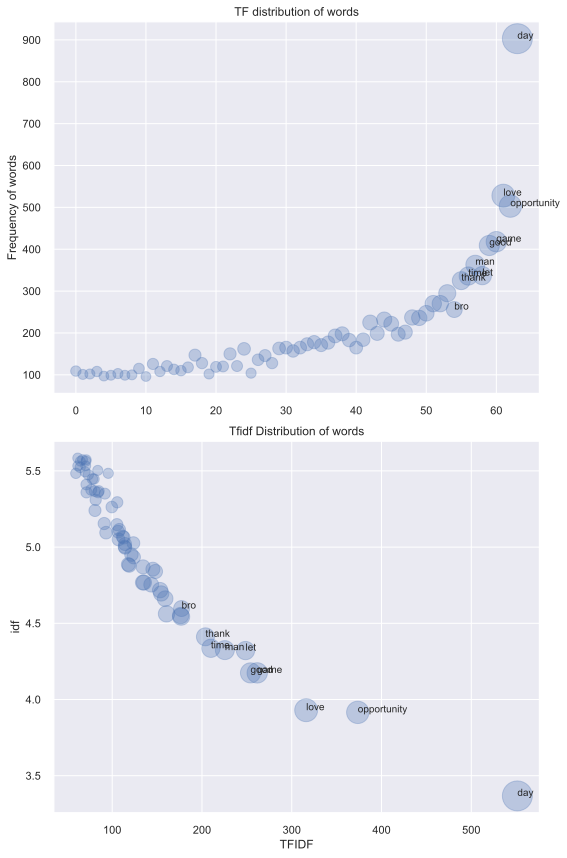

In [109]:
#Plotting
fig,axs = plt.subplots(nrows=2,ncols=1,facecolor='w',figsize=(8,12))

##
ax = axs[0]
ax.set_title('TF distribution of words')
ax.scatter(x = np.arange(len(df)),y = df.tf,alpha=0.3,
           cmap='Ocean',
           s = df.tf)
for i,value in enumerate(df.word):
    if i >= len(df.tfidf)-10:
        ax.annotate(value,(i,df.tf.iloc[i]))
ax.set_ylabel('Frequency of words')        

##
ax = axs[1]
ax.set_title('Tfidf Distribution of words')
ax.scatter(df.tfidf,df.idf,
           alpha=0.3,
          s = df.tf)

ax.set_xlabel('TFIDF')
ax.set_ylabel('idf')
for i,value in enumerate(df.word):
    if i >= len(df.tfidf)-10:
        ax.annotate(value,(df.tfidf.iloc[i],df.idf.iloc[i]))
  
fig.tight_layout()
plt.show()

In [255]:
from collections import Counter
#15 most common bigrams (Term frequency)
Vectorizer = CountVectorizer(ngram_range=(2,2),
                            stop_words='english',
                            min_df=0.001,
                            max_df=0.7)
                            
tot = Vectorizer.fit_transform(Dataset.lemmas)
Y = tot.sum(axis=0).A1
counts=dict(zip(Vectorizer.get_feature_names_out(),Y))
Counter(counts).most_common(15)

[('day opportunity', 531),
 ('bless day', 80),
 ('lock dubnation', 79),
 ('happy birthday', 77),
 ('good luck', 46),
 ('big time', 37),
 ('lil bro', 36),
 ('make sure', 36),
 ('team win', 28),
 ('look forward', 27),
 ('love bro', 25),
 ('great win', 24),
 ('feel good', 23),
 ('great team', 22),
 ('love guy', 22)]

In [257]:
#15 most common bigrams (TF-IDF)
Vectorizer = TfidfVectorizer(ngram_range=(2,2),
                            stop_words='english',
                             min_df=0.001,
                             max_df=0.7,
                             sublinear_tf=True,
                             use_idf=True)
                    
tot = Vectorizer.fit_transform(Dataset.lemmas)
Y = tot.sum(axis=0).A1
counts=dict(zip(Vectorizer.get_feature_names_out(),Y))
Counter(counts).most_common(15)

[('day opportunity', 531.0),
 ('lock dubnation', 79.0),
 ('bless day', 78.84632479207947),
 ('happy birthday', 66.71293817248608),
 ('good luck', 43.187974301999525),
 ('big time', 35.5239613411438),
 ('make sure', 34.33345879617939),
 ('lil bro', 34.31122142358004),
 ('look forward', 25.425278525811937),
 ('love bro', 23.96137604263296),
 ('great win', 23.728534855942115),
 ('nt wait', 21.0),
 ('love guy', 20.79249744739135),
 ('feel good', 20.64560793834061),
 ('team win', 20.08520862521108)]

In [258]:
#15 most common trigrams (term frquency)
Vectorizer = CountVectorizer(ngram_range=(3,3))
tot = Vectorizer.fit_transform(Dataset.lemmas)
Y = tot.sum(axis=0).A1
counts=dict(zip(Vectorizer.get_feature_names_out(),Y))
Counter(counts).most_common(15)

[('another day another', 550),
 ('day another opportunity', 531),
 ('bless see another', 79),
 ('see another day', 76),
 ('can not wait', 40),
 ('can nt wait', 21),
 ('great team win', 20),
 ('show ya love', 17),
 ('parking lot chronicle', 14),
 ('day another blessing', 13),
 ('let keep go', 13),
 ('can not believe', 12),
 ('god da great', 11),
 ('got to get', 11),
 ('feel good back', 10)]

In [259]:
#15 most common trigrams (TF-IDF)
Vectorizer = TfidfVectorizer(ngram_range=(3,3))
tot = Vectorizer.fit_transform(Dataset.lemmas)
Y = tot.sum(axis=0).A1
counts=dict(zip(Vectorizer.get_feature_names_out(),Y))
Counter(counts).most_common(15)

[('another day another', 380.70462346285217),
 ('day another opportunity', 375.959632663133),
 ('bless see another', 51.876152637378496),
 ('see another day', 51.26007266526593),
 ('can not wait', 13.161330517331788),
 ('day another blessing', 11.13947978690072),
 ('can nt wait', 9.23219893457099),
 ('great team win', 9.017973174425265),
 ('god da great', 8.112789683317402),
 ('got to chill', 7.5785635834246365),
 ('go pack go', 7.0),
 ('happy new year', 6.652409393377228),
 ('let keep roll', 5.841681003124781),
 ('feel good back', 5.629195491988435),
 ('parking lot chronicle', 5.614203116946239)]

## Dimensionality reduction for Visualization

### TSNEvisualizer

I decided to use the TSNE to compress in two components my TFIDF matrix and look at how the words distribute among the different Players. The technique chosen was part of the package yellowbrick.

In [1]:

#pip install yellowbrick

from yellowbrick.text import TSNEVisualizer

/Users/fabiomartino/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/fabiomartino/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the 

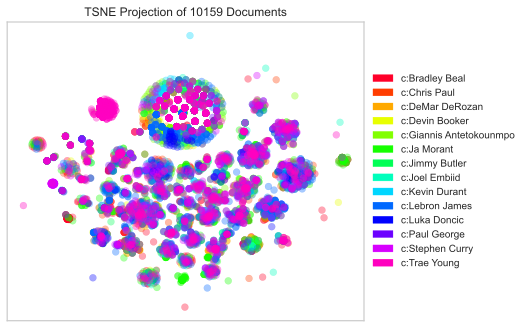

<AxesSubplot:title={'center':'TSNE Projection of 10159 Documents'}>

In [12]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer(colormap='gist_rainbow',alpha=0.35,randomstate=1 )
tsne.fit(X2, color  = ["c:{}".format(c) for c in Dataset.names ])
tsne.show()

# Clustering 

In [13]:
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
Vectorizer = TfidfVectorizer(ngram_range=(1,2),
                            analyzer='word',
                            stop_words='english',
                            min_df=0.001,
                            max_df=0.7,
                            sublinear_tf=True,
                            use_idf=True)
X = Vectorizer.fit_transform(Dataset.tokens)

In [15]:
#Calibrating the optimal number of clusters according to silhouette_score
from tqdm import tqdm
scores = []
for n_clusters in tqdm(range(10,30)):
    km = KMeans(n_clusters=n_clusters)
    cluster =km.fit_predict(X)
    scores.append(silhouette_score(X,cluster))
    

100%|███████████████████████████████████████████| 20/20 [00:43<00:00,  2.15s/it]


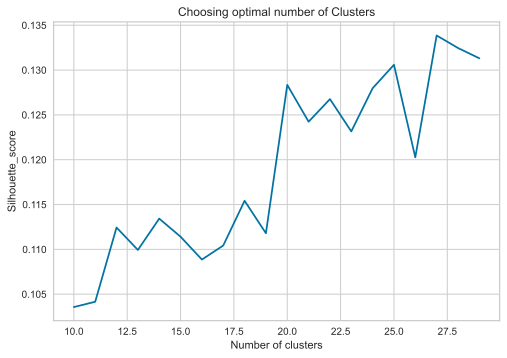

In [17]:
#plt.plot(np.arange(10,30,1),scores)
plt.plot(range(10,30),scores,'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_score')
plt.title('Choosing optimal number of Clusters')
plt.show()

In [172]:
k=27
km = KMeans(n_clusters=k,max_iter=500,random_state=13)
X = Vectorizer.fit_transform(Dataset.tokens)
km.fit_predict(X)
order_centroids = km.cluster_centers_.argsort()[:,::-1]
feature_names = Vectorizer.get_feature_names()
clusters = []
for i in range(k):
    l = []
    for j in order_centroids[i, :10]:
        l.append(feature_names[j])
    print(f'cluster {i}:{l}')
    clusters.append(f'Cluster {i}')

cluster 0:['thank', 'thank god', 'fans', 'god', 'great', 'love', 'appreciate', 'support', 'means', 'kids']
cluster 1:['time', 'man', 'good', 'bro', 'happy', 'like', 'new', 'know', 'great', 'dawg']
cluster 2:['lock', 'lock dubnation', 'dubnation', 'guess', 'currybrand', 'lets', 'time', 'glad', 'gmchummerev', 'giving']
cluster 3:['love', 'love bro', 'bro', 'happy', 'appreciate', 'love guy', 'guy', 'brother', 'birthday', 'appreciate love']
cluster 4:['lol', 'bro', 'man', 'nt', 'nah', 'aye', 'love', 'like', 'gone', 'bruh']
cluster 5:['dat', 'like dat', 'like', 'mf', 'dawg', 'say', 'energy', 'talk', 'gon', 'yeah']
cluster 6:['ca nt', 'ca', 'nt', 'nt wait', 'wait', 'man', 'nt believe', 'believe', 'stop', 'love']
cluster 7:['day opportunity', 'opportunity', 'day', 'vote', 'generation', 'gmchummerev', 'glad', 'giving', 'girls', 'girl']
cluster 8:['congrats', 'congrats bro', 'bro', 'guy', 'big', 'coach', 'deserved', 'time', 'congrats brother', 'gang']
cluster 9:['da', 'odds', 'beat', 'building'

/Users/fabiomartino/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [184]:
categories = ['cl Appreciation 1','cl Undetermined 1','cl Marketing ','cl Happy 1','cl Undetermined 2','cl slang 1',
              'cl Undetermine 3', 'cl Opportunity 1','cl Politics','cl Congratulation 1','cl slang2','cl Cheering','cl Undetermined 4',
             'cl Family 1','cl Basket-terminology','cl Congratulation 2','cl Game-focus','cl Healthy','cl Undetrmined5 '
             ,'cl Positive-vibe','cl Appreciation 2','cl Basket-terminology 2','cl Undetermined 6','cl slang 3','cl Game-focus 2',
             'cl slang 4','cl slang 5']
d = {i:v for i,v in zip(range(27),categories)}
l = []
for i in km.labels_:
    l.append(d[i])
data = pd.DataFrame(data=pd.Series(l))
data.rename({0:'Categories'},axis=1,inplace=True)

# CLUSTER VISUALIZATION

## DIMENSIONALITY REDUCTION
### SVD

In [185]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import seaborn as sb
def plot_vectors(vectors, title='Clustering', labels=None, instance_id=None, dimensions=3):
    """
    plot the vectors in 2 or 3 dimensions. 
    If labels are supplied, use them to color the data accordingly
    """
    # set up graph
    fig = plt.figure(figsize=(10,10))

    # create data frame
    df = pd.DataFrame(data={'x':vectors[:,0], 'y': vectors[:,1]})
    # add labels, if supplied
    if labels is not None:
        df['label'] = labels
    else:
        df['label'] = [''] * len(df)

    if instance_id is not None:
        df['instance_id'] = instance_id
    else:
        df['instance_id'] = [''] * len(df)

    # assign colors to labels
    cm = plt.get_cmap('tab20') # choose the color palette
    n_labels = len(df.label.unique())
    label_colors = [cm(1. * i/n_labels) for i in range(n_labels)]
    cMap = colors.ListedColormap(label_colors)
        
    # plot in 3 dimensions
    if dimensions == 3:
        # add z-axis information
        df['z'] = vectors[:,2]
        # define plot
        ax = fig.add_subplot(111, projection='3d')
        frame1 = plt.gca() 
        # remove axis ticks
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        frame1.axes.zaxis.set_ticklabels([])

        # plot each label as scatter plot in its own color
        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            color_values = [label_colors[l]] * len(df2)
            ax.scatter(df2['x'], df2['y'], df2['z'], 
                       c=color_values, 
                       cmap=cMap, 
                       edgecolor='black', 
                       label=label, 
                       alpha=0.4, 
                       s=100)

        for x, y, z, i in zip(df.x, df.y, df.z, df.instance_id):
            ax.text(x, y, z, i, size=8)
      
    # plot in 2 dimensions
    elif dimensions == 2:
        ax = fig.add_subplot(111)
        frame1 = plt.gca() 
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])

        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            color_values = [label_colors[l]] * len(df2)
            ax.scatter(df2['x'], df2['y'], 
                       c=color_values, 
                       cmap=cMap, 
                       edgecolor='black', 
                       label=label, 
                       alpha=0.6, 
                       s=100)

        for x, y, i in zip(df.x, df.y, df.instance_id):
            ax.text(x, y, i, size=8)

            
    else:
        raise NotImplementedError()

        
        
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()


## 2D Visualization 

CPU times: user 112 ms, sys: 53.3 ms, total: 166 ms
Wall time: 59.5 ms


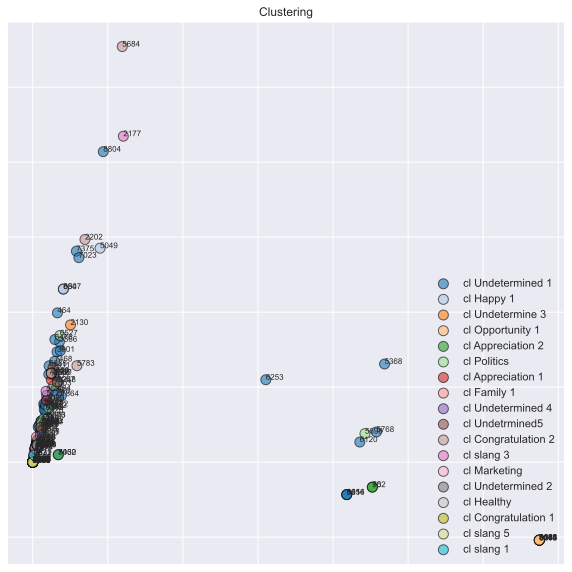

In [186]:
from sklearn.decomposition import TruncatedSVD
np.random.seed(14)
%time X_SVD2 = TruncatedSVD(n_components=2).fit_transform(X2)
sample_idxs = np.random.choice(X_SVD2.shape[0], replace=False, size=200)
X_SVD2_sample = X_SVD2[sample_idxs]
categories = data.Categories.values[sample_idxs]
plot_vectors(X_SVD2_sample, labels=categories, instance_id = sample_idxs, dimensions =X_SVD2_sample.shape[1] )

## 3D Visualization

CPU times: user 83 ms, sys: 23.4 ms, total: 106 ms
Wall time: 29.7 ms


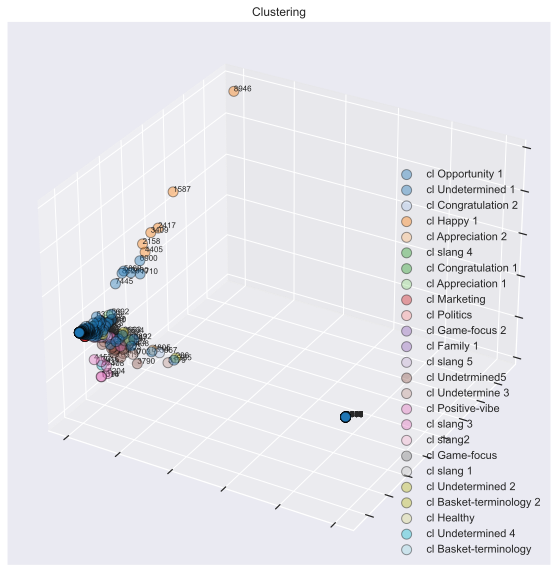

In [187]:
np.random.seed(3)
%time X_SVD3 = TruncatedSVD(n_components=3).fit_transform(X)
sample_idxs = np.random.choice(X_SVD3.shape[0], replace=False, size=300)
X_SVD3_sample = X_SVD3[sample_idxs]
categories = data.Categories.values[sample_idxs]
plot_vectors(X_SVD3_sample, labels=categories, instance_id = sample_idxs, dimensions =X_SVD3_sample.shape[1] )

The visualizations of the clusters confirms my hypothesis and what the TFIDF visualization had shown previously: the Players vocabularies tend to overlap. As expected the terminology used by the players belong for a large part to the sphere of the game preparation, to make congratulations to another user. However we also notice a general attitude of appreciation that might be meant for the fans, or for some religious message. 
Furthemore, it's possible spot a cluster of political-words, which was expected as some of the players I chose for this dataset are well known for their political involvement, altough we can see how their way of addressing such issues does not require them to use a different vocabulary, it indeed coincides also with some of the slangs clusterings, and this is in line with our expectations as twitter is a social used to communicate in a direct way with the fanbase.

# Topic Model

## LDA

In [34]:
from gensim.models import LdaMulticore, TfidfModel, CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.phrases import Phrases,ENGLISH_CONNECTOR_WORDS

import time 
import multiprocessing

In [129]:
corpus = []
for sentence in tqdm(Dataset.tokens):
    trans = ""
    for token in nlp(sentence):
        if token.pos_ in {'NOUN','ADJ','ADV','X','PROPN'} and len(token)>1:
                trans += (token.text.strip()+" ")
    if trans != "":
        corpus.append(trans.strip())


100%|██████████████████████████████████████| 9302/9302 [00:29<00:00, 316.92it/s]


In [143]:
clean_cp = pd.Series(corpus)
instances = clean_cp.apply(str.split).tolist()
#creating a dictionary of the tweets based on their frequencies
phrases = Phrases(instances, min_count=5,threshold=1,connector_words=ENGLISH_CONNECTOR_WORDS)
collocations = phrases[instances]
dictionary = Dictionary(collocations)
#take out too rare or too frequent words
dictionary.filter_extremes(no_below=10, no_above=0.25)
#I then used gensim to transform the corpus into a TFIDF-weighted matrix
ldacorpus = [dictionary.doc2bow(tweet) for tweet in instances]

model = TfidfModel(ldacorpus)
model_corpus = model[ldacorpus]

In [152]:
coherence_scores = []

for n_topics in range(3,15):
    model = LdaMulticore(corpus=model_corpus, 
                         id2word=dictionary, 
                         num_topics=n_topics, random_state=8)

    coherencemodel_umass = CoherenceModel(model=model, 
                                          texts=instances, 
                                          dictionary=dictionary, 
                                          coherence='u_mass')

    coherencemodel_cv = CoherenceModel(model=model, 
                                       texts=instances, 
                                       dictionary=dictionary, 
                                       coherence='c_v')

    umass_score = coherencemodel_umass.get_coherence()
    cv_score = coherencemodel_cv.get_coherence()
    print(n_topics, umass_score, cv_score)
    coherence_scores.append((n_topics, umass_score, cv_score))



3 -7.66287615785689 0.45090535719817054
4 -8.487241396389852 0.42908411690616244
5 -8.783923299782504 0.43478027361757743
6 -8.76098665356853 0.39993754813520876
7 -9.131388310295348 0.4195579531363152
8 -9.066753988254854 0.41519896413792845
9 -9.57860707835274 0.43125815497124986
10 -8.968197547898743 0.41886753086984285
11 -10.083554563860034 0.44847269899587056
12 -10.167590598280563 0.45797047868532753
13 -10.106289409738899 0.44747981698681605
14 -10.110483366832728 0.4631206809489103


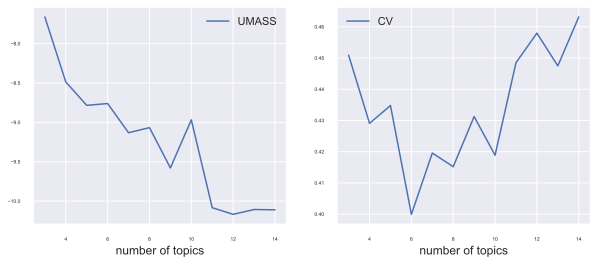

In [153]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
scores = pd.DataFrame(coherence_scores,columns = ['n_topics','UMASS','CV'])

ax = axs[0]
ax.plot(scores.n_topics,scores.UMASS,label ='UMASS')
ax.set_xlabel('number of topics')
ax.legend()

ax = axs[1]
ax.plot(scores.n_topics,scores.CV,label='CV')
ax.set_xlabel('number of topics')

plt.legend()
plt.show()

In [154]:
num_topics = 5
alpha = 0.1

while alpha <= 0.5:
    num_passes = 10 #number of passes over data
    chunk_size = len(model_corpus) * num_passes/200
    print(chunk_size)

    start = time.time()
    print("fitting model", flush=True)
    model = LdaMulticore(num_topics=num_topics, 
                         corpus=model_corpus, 
                         id2word=dictionary, 
                         workers=min(10, multiprocessing.cpu_count()-1), 
                         passes=num_passes, # make this many passes over data
                         chunksize=chunk_size, 
                         alpha=alpha,
                         eval_every = 10)
    print("done in {}".format(time.time()-start), flush=True)
    topic_sep = re.compile("0\.[0-9]{3}\*") # getting rid of useless formatting
    # extract a list of tuples with topic number and descriptors from the model
    model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) 
                    for topic_no, model_topic in
                    model.print_topics(num_topics=num_topics, num_words=5)]

    descriptors = []
    for i, m in model_topics:
        print(i+1, ", ".join(m[:5]))
        descriptors.append(", ".join(m[:2]).replace('"', ''))
    print(f'alpha = {alpha} \n {descriptors}')
    alpha += 0.05


433.9
fitting model
done in 3.3290722370147705
1 "opportunity", "day", "game", "crazy", "god"
2 "dubnation", "good", "way", "man", "real"
3 "great", "much", "guys", "today", "even"
4 "congrats", "happy", "time", "guy", "brother"
5 "love", "tough", "always", "back", "lets"
alpha = 0.1 
 ['opportunity, day', 'dubnation, good', 'great, much', 'congrats, happy', 'love, tough']
433.9
fitting model
done in 3.263674259185791
1 "game", "tough", "guy", "right", "much"
2 "love", "good", "never", "new", "dawg"
3 "day", "opportunity", "happy", "brother", "different"
4 "man", "lets", "back", "always", "congrats"
5 "dubnation", "bro", "crazy", "great", "today"
alpha = 0.15000000000000002 
 ['game, tough', 'love, good', 'day, opportunity', 'man, lets', 'dubnation, bro']
433.9
fitting model
done in 3.3096461296081543
1 "game", "good", "back", "guys", "even"
2 "way", "brother", "right", "dat", "work"
3 "day", "opportunity", "congrats", "dawg", "soon"
4 "love", "bro", "always", "tough", "new"
5 "dubnati

In [155]:
num_topics = 5
num_passes = 10
chunk_size = len(model_corpus) * num_passes/2000
#chunk_size = 2000
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
model = LdaMulticore(num_topics=num_topics, 
                     corpus=model_corpus, 
                     id2word=dictionary, 
                     workers=min(10, multiprocessing.cpu_count()-1), 
                     passes=num_passes, 
                     chunksize=chunk_size, 
                     alpha=0.3,
                     eta = 0.8,
                     random_state=54)
#print("done in {}".format(time.time()-start), flush=True)

43.39
fitting model


In [156]:
#transform the data into topic distros
model.print_topics()

[(0,
  '0.040*"congrats" + 0.032*"great" + 0.031*"right" + 0.024*"proud" + 0.020*"better" + 0.020*"lol" + 0.019*"dawg" + 0.018*"soon" + 0.018*"guys" + 0.016*"da"'),
 (1,
  '0.228*"opportunity" + 0.225*"day" + 0.051*"love" + 0.037*"time" + 0.020*"today" + 0.019*"much" + 0.014*"ready" + 0.014*"team" + 0.013*"young" + 0.008*"striveforgreatness"'),
 (2,
  '0.057*"game" + 0.042*"dubnation" + 0.041*"back" + 0.031*"lets" + 0.029*"always" + 0.028*"never" + 0.027*"new" + 0.025*"year" + 0.025*"brother" + 0.023*"wemove"'),
 (3,
  '0.042*"bro" + 0.036*"way" + 0.033*"big" + 0.029*"tonight" + 0.026*"guy" + 0.019*"facts" + 0.018*"night" + 0.017*"people" + 0.016*"ad" + 0.015*"kids"'),
 (4,
  '0.045*"good" + 0.044*"man" + 0.026*"tough" + 0.020*"family" + 0.020*"real" + 0.018*"still" + 0.018*"dat" + 0.016*"yessir" + 0.015*"season" + 0.014*"amazing"')]

In [157]:
# get the topic descriptions
topic_sep = re.compile("0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) 
                for topic_no, model_topic in
                model.print_topics(num_topics=num_topics, num_words=5)]

descriptors = []
for i, m in model_topics:
    print(i+1, ", ".join(m[:5]))
    descriptors.append(", ".join(m[:2]).replace('"', ''))
descriptors

1 "congrats", "great", "right", "proud", "better"
2 "opportunity", "day", "love", "time", "today"
3 "game", "dubnation", "back", "lets", "always"
4 "bro", "way", "big", "tonight", "guy"
5 "good", "man", "tough", "family", "real"


['congrats, great',
 'opportunity, day',
 'game, dubnation',
 'bro, way',
 'good, man']

In [160]:
descriptors = ['Gratitude','Replying','Celebrating','Reporting','Game-focus']

topic_corpus = model[model_corpus]

target_category = 'names'

# get a list with the topic scores for each document
scores = [[t[1] for t in topic_corpus[entry]] for entry in range(len(instances))]
#print(scores)

# turn that into a data frame with N rows and K columns, 
# each with the score of the corresponding topic
topic_distros = pd.DataFrame(data=scores, columns=descriptors)

# add the review category of each document as column (so we can aggregate)
topic_distros['category'] = Dataset[target_category]

### LDA VISUALIZATION
### V.1 Topics by players

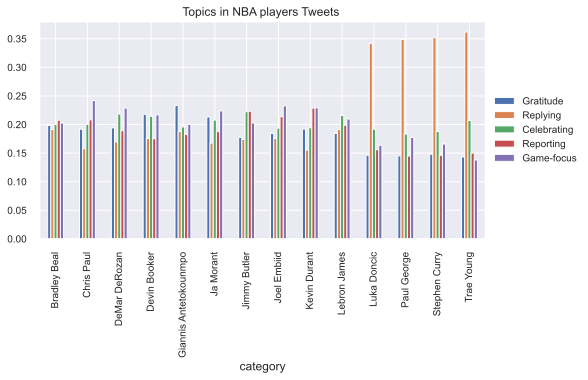

In [161]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn
#seaborn.set_context('poster')
fig, ax = plt.subplots(figsize=(8, 4)) 
plt.title('Topics in NBA players Tweets ')

# aggregate topics by categories
aggregate_by_category = topic_distros[topic_distros.category.isin(('Bradley Beal',
'Chris Paul',
 'DeMar DeRozan',
 'Devin Booker',
 'Giannis Antetokounmpo',
 'Ja Morant',
 'Jimmy Butler',
 'Joel Embiid',
 'Kevin Durant',
 'Lebron James',
 'Luka Doncic',
 'Paul George',
 'Stephen Curry',
 'Trae Young'))]
aggregate_by_category = aggregate_by_category.groupby(aggregate_by_category.category).mean()
aggregate_by_category
# plot the graph
aggregate_by_category[descriptors].plot.bar(ax=ax,fontsize=10)
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)

# move the legend out
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5),fontsize=10)
plt.show()

## V.2 Topics distance and distribution

#### I rewrite all the model to make it runnable indipendently from the first one because I modified first one labels to make it more 
#### readable from the graph, so running this second model won't affect the first one.

In [652]:
from gensim.models import LdaMulticore, TfidfModel, CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.phrases import Phrases,ENGLISH_CONNECTOR_WORDS

import time 
import multiprocessing

In [653]:
corpus = []
for sentence in tqdm(Dataset.tokens):
    trans = ""
    for token in nlp(sentence):
        if token.pos_ in {'NOUN','ADJ','ADV','X','PROPN'} and len(token)>1:
                trans += (token.text.strip()+" ")
    if trans != "":
        corpus.append(trans.strip())

100%|████████████████████████████████████| 10159/10159 [00:33<00:00, 306.49it/s]


In [654]:
clean_cp = pd.Series(corpus)
instances = clean_cp.apply(str.split).tolist()
#creating a dictionary of the tweets based on their frequencies
phrases = Phrases(instances, min_count=5,threshold=1,connector_words=ENGLISH_CONNECTOR_WORDS)
collocations = phrases[instances]
dictionary = Dictionary(collocations)
#take out too rare or too frequent words
dictionary.filter_extremes(no_below=10, no_above=0.2)
#I then used gensim to transform the corpus into a TFIDF-weighted matrix
ldacorpus = [dictionary.doc2bow(tweet) for tweet in instances]

model = TfidfModel(ldacorpus)
model_corpus = model[ldacorpus]

In [96]:
num_topics = 5
num_passes = 10
chunk_size = len(model_corpus) * num_passes/2000
#chunk_size = 2000
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
model = LdaMulticore(num_topics=num_topics, 
                     corpus=model_corpus, 
                     id2word=dictionary, 
                     workers=min(10, multiprocessing.cpu_count()-1), 
                     passes=num_passes, 
                     chunksize=chunk_size, 
                     alpha=0.3,
                     eta = 0.8,
                     random_state=51)

47.41
fitting model


In [97]:
topic_sep = re.compile("0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) 
                for topic_no, model_topic in
                model.print_topics(num_topics=num_topics, num_words=5)]

descriptors = []
for i, m in model_topics:
    print(i+1, ", ".join(m[:5]))
    descriptors.append(", ".join(m[:2]).replace('"', ''))
descriptors

1 "opportunity", "day", "love", "congrats", "tough"
2 "good", "always", "wemove", "tonight", "real"
3 "time", "big", "new", "right", "year"
4 "game", "dubnation", "happy", "never", "guy"
5 "man", "back", "bro", "way", "lets"


['opportunity, day',
 'good, always',
 'time, big',
 'game, dubnation',
 'man, back']

In [98]:
topic_corpus = model[model_corpus]

target_category = 'names'

# get a list with the topic scores for each document
scores = [[t[1] for t in topic_corpus[entry]] for entry in range(len(instances))]
#print(scores)

# turn that into a data frame with N rows and K columns, 
# each with the score of the corresponding topic
topic_distros = pd.DataFrame(data=scores, columns=descriptors)

# add the review category of each document as column (so we can aggregate)
topic_distros['category'] = Dataset[target_category]

In [660]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from imp import reload
pyLDAvis.enable_notebook()

lda_display = gensimvis.prepare(model, model_corpus,dictionary,sort_topics=False,mds='mmds')
#pyLDAvis.display(lda_display)


/Users/fabiomartino/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [659]:
pyLDAvis.disable_notebook()

# LANGUAGE MODEL

## 1.Trigram Model

In [101]:
def generate(INPUT=None):
    result = [START,START]
    if INPUT != None:

        inp = [token.text for token in nlp(INPUT)]
        tok = [START,START] + inp + [STOP]
        for u,v,w in nltk.ngrams(tok, 3):
            counts[(u,v)][w] += 1

        for word in inp:
            result.append(word)

    next_word = sample_next_word(result[-2],result[-1])
    result.append(next_word)
    while next_word != STOP:
        next_word = sample_next_word(result[-2], result[-1])
        result.append(next_word)

    return ' '.join(result[2:-1])

def sample_next_word(u, v):

    keys, values = zip(*counts[(u, v)].items())

    values = np.array(values)
    values /= values.sum() 
    sample = np.random.multinomial(1, values)

    return keys[np.argmax(sample)]
def logP(u, v, w):
    
    #compute the log probability of a trigram
    return np.log(counts[(u, v)][w]) - np.log(sum(counts[(u, v)].values()))

def sentence_logP(S):
    #score a sentence in log likelihood with chain rule
    tokens = [START, START] + S + [STOP]
    return sum([logP(u, v, w) for u, v, w in nltk.ngrams(tokens, 3)])

In [102]:
def get_perplexity(corpus):
    tot = 0.0
    for sentence in corpus:
        tokens = [START,START] + sentence +[STOP]
        entropy = -sum([np.exp(logP(u,v,w)) * logP(u,v,w) for u,v,w in nltk.ngrams(tokens,3)])
        perplexity = 2**entropy
        tot += perplexity
    return tot

In [103]:
from collections import defaultdict
import numpy as np
import nltk
smoothing = 0.01
perplexity = defaultdict()

while smoothing < 0.5:
    START = '_***_'
    STOP = '_STOP_'

    counts = defaultdict(lambda: defaultdict(lambda: smoothing))

    corpus = [line.strip().split() for line in Dataset.tokens]

    for sentence in corpus:
        tokens = [START, START] + sentence + [STOP]
        for u, v, w in nltk.ngrams(tokens, 3):
            counts[(u, v)][w] += 1
    
    perp = get_perplexity([['Another Day Another Opportunity']])
    #print(f'smoothing:{smoothing}\n{perplexity}')
    perplexity[smoothing]=perp
    smoothing += 0.01

In [231]:
#getting the value of smoothing that yielded the smallest perplexity
min(perplexity.items(), key = lambda x:x[1])

(0.01, 1.0000094075453978)

In [145]:
from collections import defaultdict
import nltk
smoothing = 0.01
START = '_***_'
STOP = '_STOP_'

counts = defaultdict(lambda: defaultdict(lambda: smoothing))

corpus = [line.strip().split() for line in Dataset.tokens]

for sentence in corpus:
    tokens = [START, START] + sentence + [STOP]
    for u, v, w in nltk.ngrams(tokens, 3):
        counts[(u, v)][w] += 1
        

In [28]:
#Check wheter the model is working correctly, I confronted some new tweets coming from the page of an NBA player I did
#not include in my dataset and some tweets coming form the twitter official page of Barack Obama 
#Damian Lillard 
print('Damian Lillard')
print(get_perplexity([['My bad bra I got on to comment on a fight and got back off lol 💪🏾😂']]))

Damian Lillard
1.0000094074854644


In [26]:
#Different sport 
print('Rafael Nadal')
print(get_perplexity([['Tomorrow…. Keep your eyes open … 😉']]))

Rafael Nadal
1.0000094074940262


In [25]:
#Different topic: Politics
print('Barack Obama')
print(get_perplexity([['Today President of the USA announced that the USA will be welcoming refugees']]))

Barack Obama
1.000009407502588


In [24]:
#Different language: Italian
print('Italian')
print(get_perplexity([['Forza Grande Magica Roma']]))

Italian
1.00000940751115


In [687]:
generate('playing')

'playing bucket got game point ! ! ad'

In [689]:
generate('play')

'play'

In [693]:
generate('game')

'game crazyyyyyy ! ! 🤣 🤣 🤣 🤣 🤣'

In [79]:
generate('gameday')

'gameday mood ! ! ! 🗣'

In [107]:
generate('gameday')

'gameday lets get . take game . jigsaw dubnation'

In [118]:
generate('gameday')

'gameday mood 😁'

In [728]:
generate('today')

'today great day wildcat !'

In [136]:
generate('tonight')

'tonight going extremely special ! 🤞 💙'

In [81]:
generate('focus')

'focus present .. 💯'

In [82]:
generate('team')

'team league went difficult week . going unreal ! ! jazz smart hell bring ... knows everything know league leading team ! counted like greek flags 🇬 🇷 🏆 .. ! ! ! forever 💯 ❤ ️ 🏀'

In [84]:
generate('work')

'work bronny ! 🙏 🏾‼️‼️ p.s . ca nt tell 💯'

In [730]:
generate('bad')

'bad braté 🤦 ♂ ️'

In [740]:
generate('sad')

'sad think knew comin though ! 😔 🤦 ♂ ️damn'

In [29]:
get_perplexity([['Come on']])

1.0000094074769026

In [30]:
get_perplexity([['Focus on the game']])

1.0000094074683405

## First Conclusions 

# Sentimental Analysis
### A brief analysis of the mood NBA players express via twitter the days before the game


In [66]:
Dataset = pd.read_csv('cleandataset.csv',lineterminator='\n',index_col=0)
Dataset.stems = Dataset.stems.astype(str)
Dataset.tokens = Dataset.tokens.astype(str)
Dataset.lemmas = Dataset.lemmas.astype(str)

In [67]:
#***
#pip install vaderSentiment 
#***
from sklearn.decomposition import LatentDirichletAllocation
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [68]:
def sentiment_analysis(corpus):
    sentiment = [0] * len(corpus)
    for i,sentence in enumerate(corpus):
        score = analyser.polarity_scores(sentence)
        sentiment[i] = score
    return sentiment

In [69]:
sentiment_text = sentiment_analysis(Dataset.text)
sentiment_tokens = sentiment_analysis(Dataset.tokens)
sentiment_lemmas = sentiment_analysis(Dataset.lemmas)
sentiment_stems = sentiment_analysis(Dataset.stems)

In [70]:
new_df = pd.DataFrame()
senti_token_compound = []
senti_lemma_compound = []
sentiment_result_token = []
sentiment_result_lemma = []

for senti_token, senti_lemma in zip(sentiment_tokens,sentiment_lemmas):
    #senti_token_pos = [], senti_token_neu = [], senti_token_neg = []
    senti_token_compound.append(senti_token["compound"])
    if senti_token["compound"] >= 0.05:
        sentiment_result_token.append("positive")
    elif senti_token["compound"] <= -0.05:
        sentiment_result_token.append("negative")
    else:
        sentiment_result_token.append("neutral")
            

    senti_lemma_compound.append(senti_lemma["compound"])
    if senti_lemma["compound"] >= 0.05:
        sentiment_result_lemma.append("positive")
    elif senti_lemma["compound"] <= -0.05:
        sentiment_result_lemma.append("negative")
    else:
        sentiment_result_lemma.append("neutral")

df = pd.DataFrame({"Tweets":Dataset.text,
                   "Player":Dataset.names,
                   "Date": Dataset.Date,
                   "Tok_compound":senti_token_compound,
                   "Tok_result":sentiment_result_token,
                   "Lemma_compound":senti_lemma_compound,
                   "Lemma_result":sentiment_result_lemma})
df.head(10)

,Tweets,Player,Date,Tok_compound,Tok_result,Lemma_compound,Lemma_result
0,It’s time!!! The journey starts tonight! DC le...,Bradley Beal,2017-10-18,0.0000,neutral,0.0000,neutral
1,Blessed to see another day!! 🙏🏽,Bradley Beal,2017-10-18,0.6688,positive,0.5242,positive
2,Prayers up for Gordon Hayward !!! 🙏🏽,Bradley Beal,2017-10-18,0.0000,neutral,0.0000,neutral
3,The Vault was electric! We need that every nig...,Bradley Beal,2017-10-19,0.0000,neutral,0.0000,neutral
4,Great team win tonight Wiz!!,Bradley Beal,2017-10-19,0.8585,positive,0.8585,positive
5,Gamedayyy!!! 🙏🏽,Bradley Beal,2017-10-20,0.0000,neutral,0.0000,neutral
6,S/o my young bull @JericoleHellems for committ...,Bradley Beal,2017-10-21,0.4939,positive,0.6249,positive
7,Another day to perform His will🙏🏽,Bradley Beal,2017-10-21,0.0000,neutral,0.0000,neutral
8,GREAT TEAM WIN!!! Once again The Vault was bey...,Bradley Beal,2017-10-21,0.9499,positive,0.9499,positive
9,😂😂 headset went flying https://t.co/SaDiTBn4py,Bradley Beal,2017-10-22,0.7003,positive,0.7003,positive


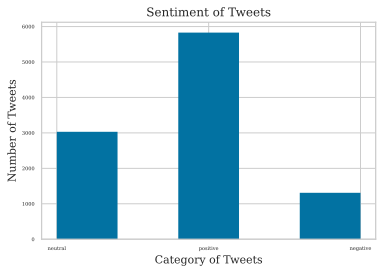

In [71]:
#Plotting the result to have a first general idea of the distribution of sentiments between tweets
fig = plt.figure(num=1,figsize=(6,4))
plt.hist(df.Tok_result,bins=5,density=False)
plt.xlabel('Category of Tweets')
plt.ylabel('Number of Tweets')
plt.title('Sentiment of Tweets')
plt.show()

`Lemmas_compound`: measure of sentiment for a tweet's lemmas 

`Tokens_compound`: measure of sentiment for a tweet's tokens

`EFG`: metrics used to evaluate player performance  [(Fieldgoals + 0.5*(3Points))/FieldGoalAttempted]

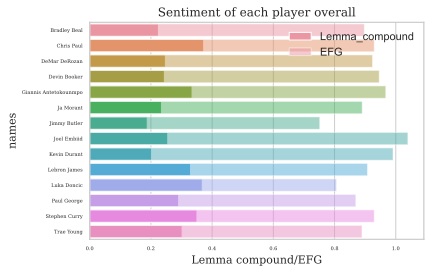

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

d1 = df.groupby(by = "Player").mean()
d1.reset_index(inplace=True)
df1 = Dataset.groupby(['names','Date']).mean()
df1.reset_index(inplace=True)
df1.replace([np.inf,-np.inf],np.nan,inplace=True)
df1.dropna(inplace=True)
df1 = df1[['names','EFG']]
df1 = df1.groupby('names').mean()
df1.reset_index(inplace=True)
fig, ax = plt.subplots()
ax.set_title('Sentiment of each player overall')
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x = "Lemma_compound", y = "Player",
            alpha = 1, data = d1,label='Lemma_compound')
sns.barplot(x = "EFG", y = "names",
            alpha = 0.5, data = df1, label='EFG',ci=95)
ax.set_xlabel('Lemma compound/EFG')
plt.legend()
plt.show()

In [73]:
Dataset.EFG = Dataset.EFG.replace([np.inf,-np.inf],np.nan)
Dataset.dropna(inplace=True)
df.Tok_compound = df.Tok_compound.replace([np.inf,-np.inf],np.nan)
df.Tok_compound.dropna(how='any',inplace=True)
df.Lemma_compound = df.Lemma_compound.replace([np.inf,-np.inf],np.nan)
df.Lemma_compound.dropna(how='any',inplace=True)
df2 = pd.merge(Dataset,df,left_index=True,right_index=True)

In [74]:
# (Pearson’s correlation coefficient, 2-tailed p-value)

token_cor = pearsonr(df2["Tok_compound"], df2["EFG"])
lemma_cor = pearsonr(df2["Lemma_compound"],df2["EFG"])
print("Pearson in stemmed: {:.3f}, P-value: {:.3f}".format(token_cor[0],token_cor[1]))
print("Pearson in token: {:.3f}, P-value: {:.3f}".format(lemma_cor[0],lemma_cor[1]))

Pearson in stemmed: -0.015, P-value: 0.148
Pearson in token: -0.015, P-value: 0.160
